In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df_features = pd.read_csv('Data/Training_features.csv', index_col = 'respondent_id')
df_values = pd.read_csv('Data/Training_labels.csv', index_col = 'respondent_id')

In [11]:
df = df_features.join(df_values)

In [13]:
df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

### Target Distribution

In [18]:
df_values.h1n1_vaccine.value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [19]:
df_values.seasonal_vaccine.value_counts(normalize=True)

0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

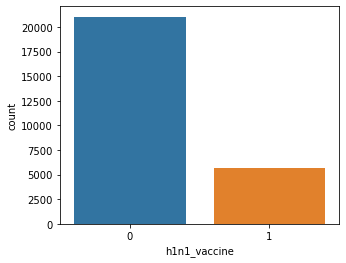

In [28]:
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(x=df.h1n1_vaccine)

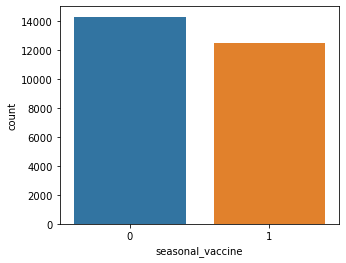

In [29]:
fig, ax = plt.subplots(figsize=(5,4))
ax = sns.countplot(x=df.seasonal_vaccine)

### Vaccine Correlation

In [30]:
df.h1n1_vaccine.corr(df.seasonal_vaccine)

0.37714265306144495

### Categorical Columns

In [38]:
cat_cols = list(df_features.select_dtypes(include='object').columns)

for col in cat_cols:
    print(f'There are {df[col].nunique()} values of the {col} feature')
    print(f'The values are {df[col].unique()}')
    print('----------------------------------')

There are 5 values of the age_group feature
The values are ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
----------------------------------
There are 4 values of the education feature
The values are ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
----------------------------------
There are 4 values of the race feature
The values are ['White' 'Black' 'Other or Multiple' 'Hispanic']
----------------------------------
There are 2 values of the sex feature
The values are ['Female' 'Male']
----------------------------------
There are 3 values of the income_poverty feature
The values are ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
----------------------------------
There are 2 values of the marital_status feature
The values are ['Not Married' 'Married' nan]
----------------------------------
There are 2 values of the rent_or_own feature
The values are ['Own' 'Rent' nan]
----------------------------------
There are 3 values o

### Numerical Columns

In [ ]:
num_cols = df_features.select_dtypes(include=['float64'])